## Crop Classification Based on Soil Type
You are a data scientist working for an agricultural organization aiming to predict the most suitable crop to plant based on soil characteristics. A fictitious dataset containing soil features and corresponding crops is provided. Your task is to build a supervised classification model to predict the type of crop.

The dataset contains 200 records with the following features:

PH: Soil pH level (a number between 3 and 10).  
Moisture (%): Soil moisture percentage (a number between 10 and 90).  
Nitrogen Content (%): Percentage of nitrogen in the soil (a number between 1 and 10).  
Soil Type:  
Sandy  
Clay  
Loam  
Recommended Crop (target class):  
"Maize"  
"Wheat"  
"Rice"  
The dataset is provided in CSV format with the columns: PH, Moisture, Nitrogen, SoilType, Crop.  

## Data Loading and Exploration  

Load the dataset from the file soil_crops.csv.  
Perform an exploratory data analysis (EDA), including descriptive statistics and visualizations, to understand the data distribution and relationships between variables.  


## Data Preparation
Split the data into training and testing sets using an 80-20 ratio.  
Scale the numerical features to ensure the algorithms perform effectively.

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

soil_crops = pd.read_csv('soil_crops.csv')
pd.set_option('display.max_rows', None)
#soil_crops

In [233]:
soil_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        200 non-null    float64
 1   Moisture  200 non-null    float64
 2   Nitrogen  200 non-null    float64
 3   SoilType  200 non-null    object 
 4   Crop      200 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


In [234]:
soil_crops.shape

(200, 5)

In [235]:
soil_crops.max()


pH           9.91
Moisture    89.24
Nitrogen     10.0
SoilType    Sandy
Crop        Wheat
dtype: object

In [236]:
soil_crops.min()

pH           3.04
Moisture     10.4
Nitrogen      1.1
SoilType     Clay
Crop        Maize
dtype: object

In [237]:
null_values = soil_crops.isnull().sum()
null_values

pH          0
Moisture    0
Nitrogen    0
SoilType    0
Crop        0
dtype: int64

In [238]:
soil_crops.describe()

,pH,Moisture,Nitrogen
count,200.000000,200.000000,200.000000
mean,6.388450,50.350200,5.686050
std,2.064389,23.439958,2.765825
min,3.040000,10.400000,1.100000
25%,4.600000,30.920000,3.297500
50%,6.465000,53.330000,5.730000
75%,8.300000,69.375000,8.297500
max,9.910000,89.240000,10.000000


<Axes: xlabel='Crop'>

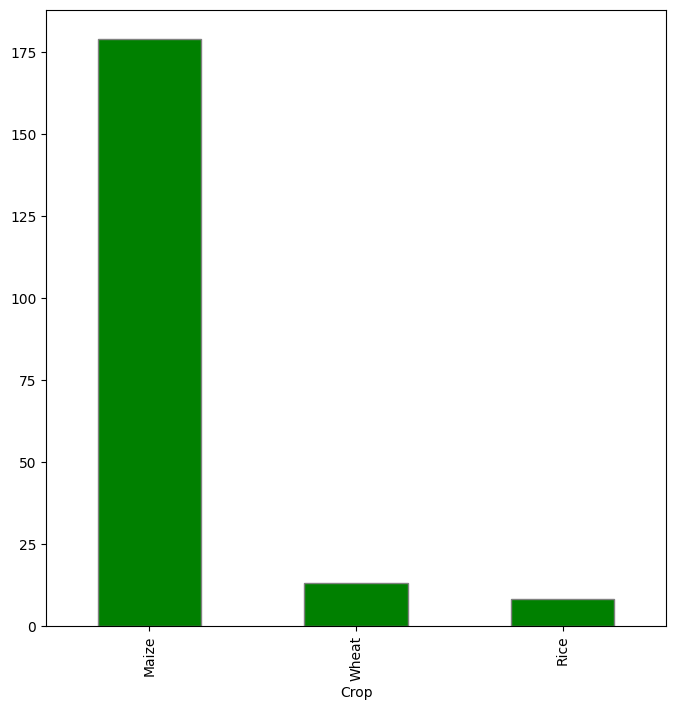

In [239]:
plt.figure(figsize=(8,8))
soil_crops['Crop'].value_counts().plot(kind='bar', color='green', edgecolor='gray')

<Axes: xlabel='SoilType'>

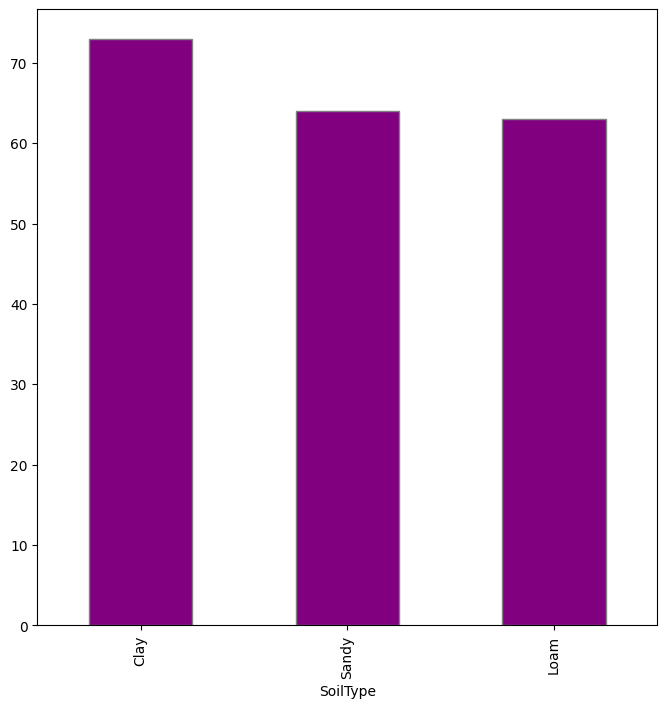

In [240]:
plt.figure(figsize=(8,8))
soil_crops['SoilType'].value_counts().plot(kind='bar', color='purple', edgecolor='gray')

<Axes: >

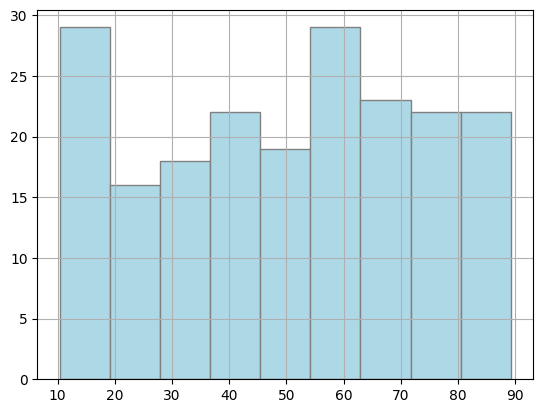

In [241]:
soil_crops['Moisture'].hist(bins=9, color='lightblue', edgecolor='gray')
#9 bins segun la regla de Sturges
#soil_crops['Moisture'].plot(kind='box') 

<Axes: >

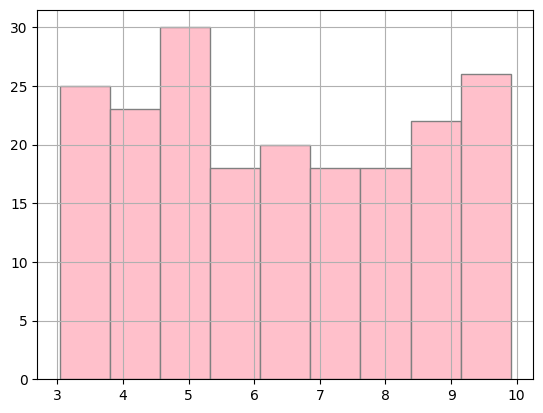

In [242]:
soil_crops['pH'].hist(bins=9, color='pink', edgecolor='gray')
#soil_crops['pH'].plot(kind='box') 

<Axes: >

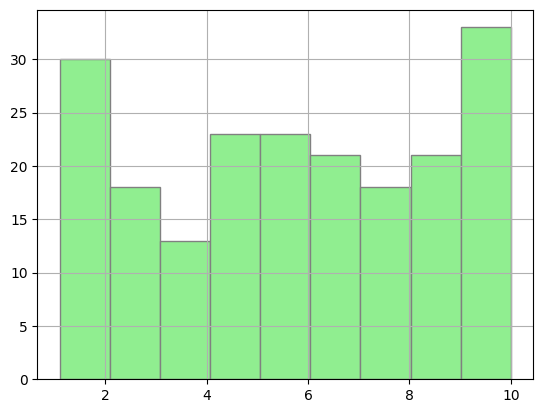

In [243]:
soil_crops['Nitrogen'].hist(bins=9, color='lightgreen', edgecolor='gray')
#soil_crops['Nitrogen'].plot(kind='box') 

## correlación entre variables 

In [244]:
corr_ph_moisture = soil_crops[['pH', 'Moisture', 'Nitrogen']].corr()
corr_ph_moisture

,pH,Moisture,Nitrogen
pH,1.000000,-0.026909,-0.046102
Moisture,-0.026909,1.000000,-0.123776
Nitrogen,-0.046102,-0.123776,1.000000


Text(0.5, 1.0, 'Correlación pH, Nitrogen, Moisture')

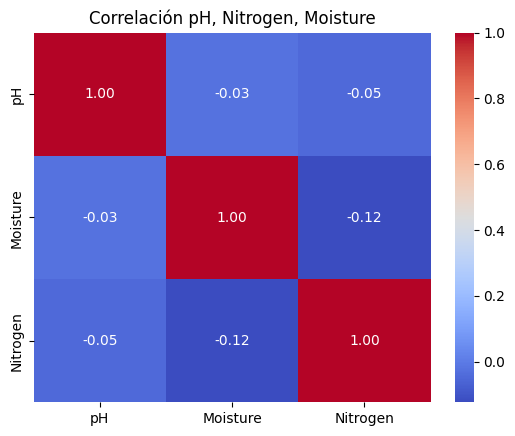

In [245]:
sns.heatmap(corr_ph_moisture, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación pH, Nitrogen, Moisture")


podemos ver que no hay mucha correlación entre las 3 variables:  
pH Nitrogen y Moisture

Text(0, 0.5, 'Moisture')

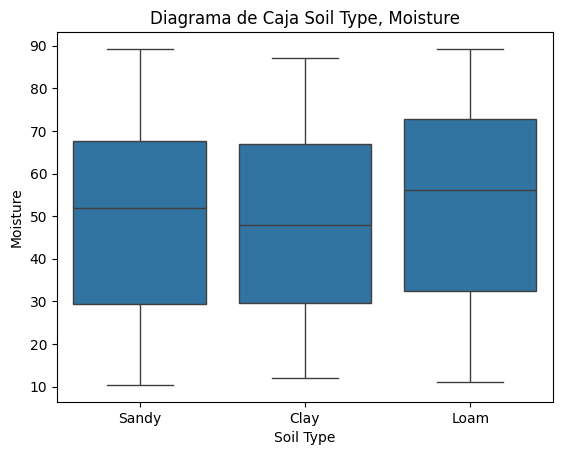

In [246]:
sns.boxplot(x='SoilType', y='Moisture', data=soil_crops)
plt.title("Diagrama de Caja Soil Type, Moisture")
plt.xlabel("Soil Type")
plt.ylabel("Moisture")

la humedad entre los 3 tipos de tierra es muy parecida en la mayoria de los casos

Text(0, 0.5, 'Nitrogen')

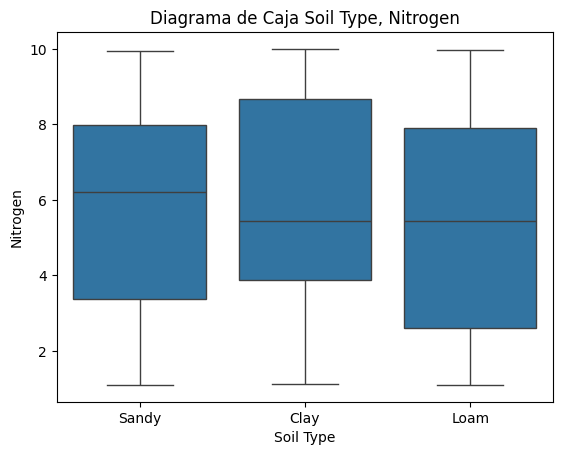

In [247]:
sns.boxplot(x='SoilType', y='Nitrogen', data=soil_crops)
plt.title("Diagrama de Caja Soil Type, Nitrogen")
plt.xlabel("Soil Type")
plt.ylabel("Nitrogen")

es similar la cantidad de nitrógeno entre los 3 tipos de tierra, sandy con valores medios por encima de loam y clay

Text(0, 0.5, 'pH')

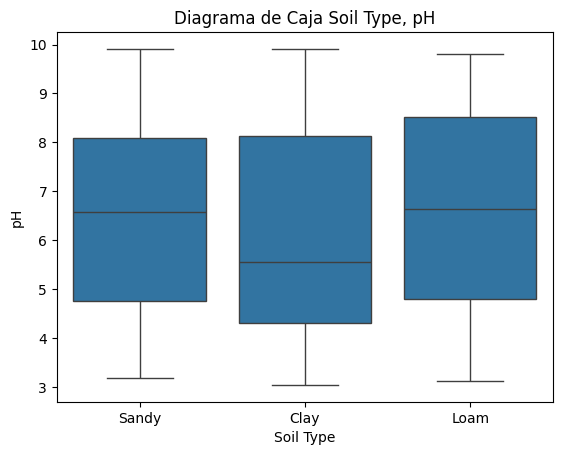

In [248]:
sns.boxplot(x='SoilType', y='pH', data=soil_crops)
plt.title("Diagrama de Caja Soil Type, pH")
plt.xlabel("Soil Type")
plt.ylabel("pH")

los niveles de ph son similares, sandy tiene menor dispersion entre los datos y clay tiene una media menor 

Text(0, 0.5, 'Moisture')

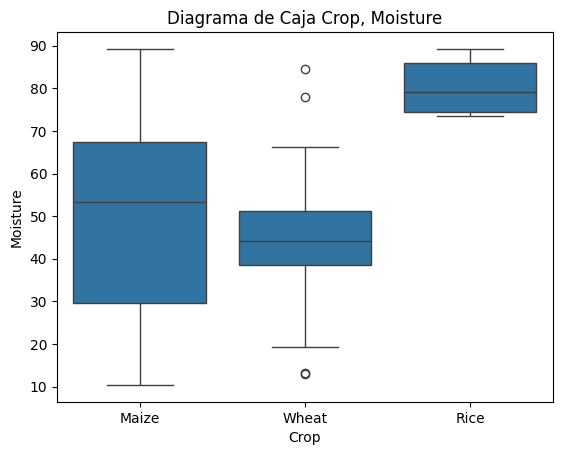

In [249]:
sns.boxplot(x='Crop', y='Moisture', data=soil_crops)
plt.title("Diagrama de Caja Crop, Moisture")
plt.xlabel("Crop")
plt.ylabel("Moisture")

la cantidad de huumedad segun cultivo si muestra mucha diferencia, el arroz requiere alta humedad arriba del 70%  
el trigo de 20% a 70% con un par de datos atípicos   
el maíz siendo el mas flexible de todos de aproximadamente 10% a 90%  

Text(0, 0.5, 'Nitrogen')

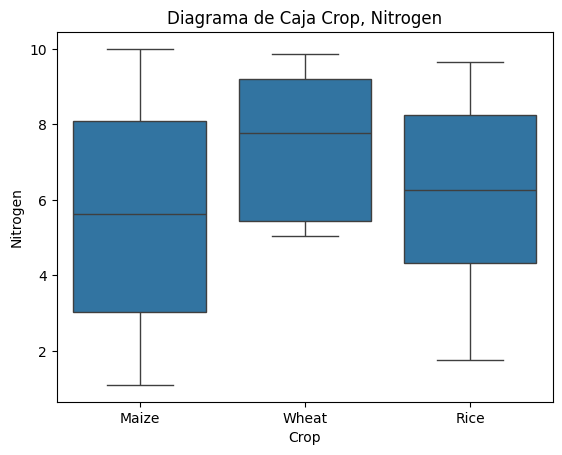

In [250]:
sns.boxplot(x='Crop', y='Nitrogen', data=soil_crops)
plt.title("Diagrama de Caja Crop, Nitrogen")
plt.xlabel("Crop")
plt.ylabel("Nitrogen") 

en nitrógeno el maíz parece ser muy flexible también de un de un 1% a 10%  
el trigo con valores de 4.5 para arriba    
y el rarroz muestra ser un poco mas flexible con 1.5% a casi 10%  



Text(0, 0.5, 'pH')

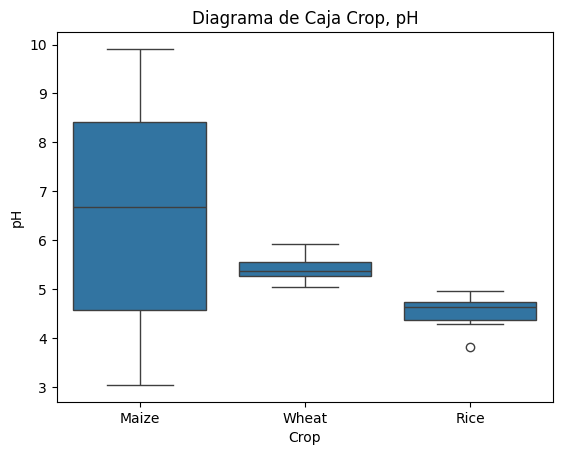

In [251]:
sns.boxplot(x='Crop', y='pH', data=soil_crops)
plt.title("Diagrama de Caja Crop, pH")
plt.xlabel("Crop")
plt.ylabel("pH")

los rangos de ph segun el cultivo parecen ser mas estrictos a excepción del maíz  
el trigo con un rango de 5 a 6  
el arroz de 4 a 5  
ambos con cuartiles muy juntos 

encontramos datos atípicos en los diagramas de caja, se eliminaran ya que los datos son para entrenar un modelo de aprendizaje automático 

calculamos valores fuera del rango intercuartílico:
IQR=Q3−Q1





In [252]:
#sacar IQR
#Los datos atípicos son valores que están fuera del rango intercuartílico (IQR)
humedad_cultivo = soil_crops.groupby('Crop')['Moisture'].agg(['quantile', 'min', 'max'])
humedad_cultivo["Q1"] = soil_crops.groupby('Crop')['Moisture'].quantile(0.25)
humedad_cultivo["Q3"] = soil_crops.groupby('Crop')['Moisture'].quantile(0.75)
IQR =  humedad_cultivo["Q3"] - humedad_cultivo["Q1"]

limite_inferior = humedad_cultivo["Q1"] - 1.5 * IQR
limite_superior = humedad_cultivo["Q3"] + 1.5 * IQR

limite_superior

Crop
Maize    124.20750
Rice     103.19625
Wheat     70.53000
dtype: float64

In [253]:
#filtrar datos  ---------------------------------------------
#datos_filtrados = soil_crops[(soil_crops['pH'] >= limite_inferior) & (soil_crops['pH'] <= limite_superior)]
limite_inferior


Crop
Maize   -27.05250
Rice     57.00625
Wheat    19.25000
dtype: float64

In [254]:
#verificar atípicos de wheat y moisture
atipicos_moisture = soil_crops[
    ((soil_crops['Moisture'] > 70.530000 ) &
     (soil_crops['Crop'] == 'Wheat') |
     (soil_crops['Moisture'] < 19.25000) &
     (soil_crops['Crop'] == 'Wheat'))
     ] 
atipicos_moisture

,pH,Moisture,Nitrogen,SoilType,Crop
19,5.04,77.94,7.77,Clay,Wheat
85,5.28,12.88,9.11,Clay,Wheat
135,5.26,13.26,9.50,Clay,Wheat
195,5.44,84.46,5.27,Clay,Wheat


In [255]:
#eliminar datos atípicos
soil_crops = soil_crops[~
    ((soil_crops['Moisture'] > 70.530000 ) &
     (soil_crops['Crop'] == 'Wheat') |
     (soil_crops['Moisture'] < 19.25000) &
     (soil_crops['Crop'] == 'Wheat'))
     ] 



Text(0, 0.5, 'Moisture')

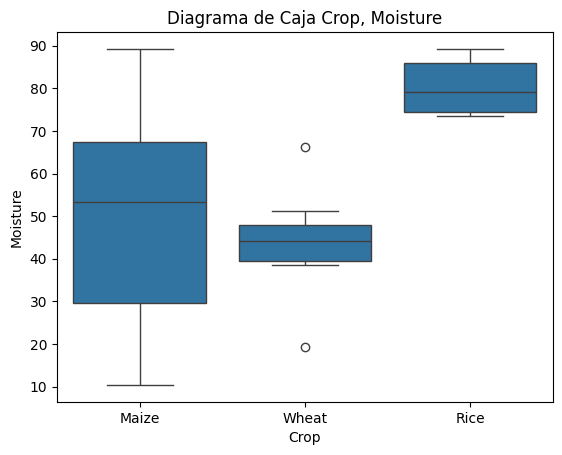

In [256]:
#corroborar con diagrama de caja
sns.boxplot(x='Crop', y='Moisture', data=soil_crops)
plt.title("Diagrama de Caja Crop, Moisture")
plt.xlabel("Crop")
plt.ylabel("Moisture")

al remover datos atípicos creó nuevos pero redujo el máximo y minimo  
podemos hacer una segunda iteración



Text(0, 0.5, 'Moisture')

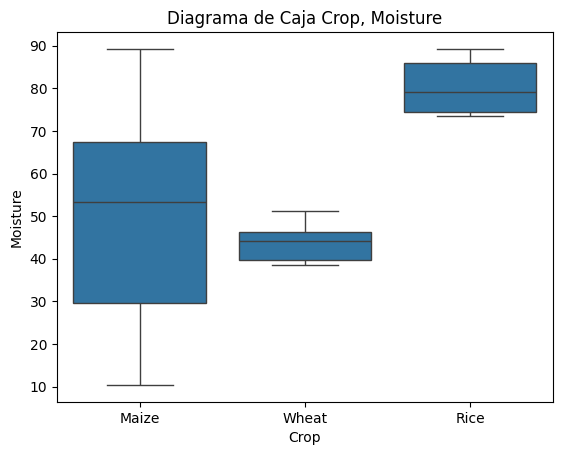

In [257]:
humedad_cultivo = soil_crops.groupby('Crop')['Moisture'].agg(['quantile', 'min', 'max'])
humedad_cultivo["Q1"] = soil_crops.groupby('Crop')['Moisture'].quantile(0.25)
humedad_cultivo["Q3"] = soil_crops.groupby('Crop')['Moisture'].quantile(0.75)
IQR =  humedad_cultivo["Q3"] - humedad_cultivo["Q1"]

limite_inferior = humedad_cultivo["Q1"] - 1.5 * IQR
limite_superior = humedad_cultivo["Q3"] + 1.5 * IQR

soil_crops = soil_crops[~
    ((soil_crops['Moisture'] > limite_superior['Wheat']) &
     (soil_crops['Crop'] == 'Wheat') |
     (soil_crops['Moisture'] < limite_inferior['Wheat']) &
     (soil_crops['Crop'] == 'Wheat'))
     ] 


#corroborar con diagrama de caja
sns.boxplot(x='Crop', y='Moisture', data=soil_crops)
plt.title("Diagrama de Caja Crop, Moisture")
plt.xlabel("Crop")
plt.ylabel("Moisture")


eliminamos datos atípicos, de moisture by crop  
falta pH by crop, específicamente de arroz

Text(0, 0.5, 'pH')

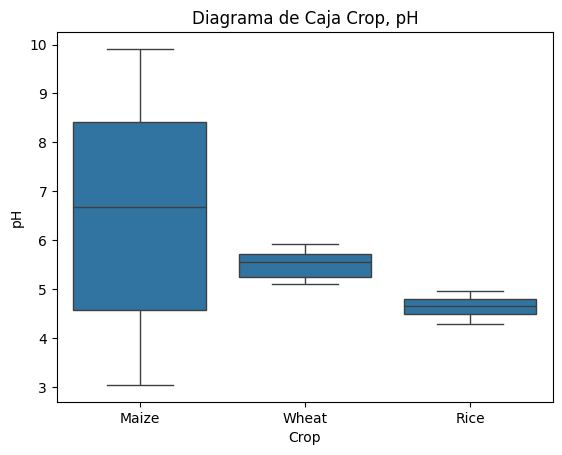

In [259]:
pH_cultivo = soil_crops.groupby('Crop')['pH'].agg(['quantile', 'min', 'max'])
pH_cultivo["Q1"] = soil_crops.groupby('Crop')['pH'].quantile(0.25)
pH_cultivo["Q3"] = soil_crops.groupby('Crop')['pH'].quantile(0.75)
IQR =  pH_cultivo["Q3"] - pH_cultivo["Q1"]

limite_inferior = pH_cultivo["Q1"] - 1.5 * IQR
limite_superior = pH_cultivo["Q3"] + 1.5 * IQR

soil_crops = soil_crops[~
    ((soil_crops['pH'] > limite_superior['Rice']) &
     (soil_crops['Crop'] == 'Rice') |
     (soil_crops['pH'] < limite_inferior['Rice']) &
     (soil_crops['Crop'] == 'Rice'))
     ] 



#corroborar con diagrama de caja
sns.boxplot(x='Crop', y='pH', data=soil_crops)
plt.title("Diagrama de Caja Crop, pH")
plt.xlabel("Crop")
plt.ylabel("pH")


datos limpios y listos para el modelo


In [261]:
soil_crops.to_csv('clean_data_soil_crops.csv')